## Libraries

In [14]:
import tensorflow as tf 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from  tensorflow.keras import models, optimizers, regularizers

## Conv Network

In [15]:
model = models.Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

## Data augmentation

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

## Scaling data

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory('./data/cats_and_dogs/train',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

validation_generator = test_datagen.flow_from_directory('./data/cats_and_dogs/validation',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Callbacks

In [19]:
checkpoint = ModelCheckpoint('model_cats_dogs.hdf5',monitor='val_accuracy', verbose= 1, save_best_only=True)

## Compiling model

In [20]:
model.compile(loss='binary_crossentropy', optimizer =optimizers.Adam(),
        metrics=['accuracy'])

## Training model

In [21]:
hist = model.fit(train_generator, steps_per_epoch=2000//32,
            epochs=100,
            validation_data=validation_generator,
            validation_steps= 1000//32,
            callbacks=[checkpoint])

Epoch 1/100
62/62 [==============================] - ETA: 0s - loss: 0.6973 - accuracy: 0.4954
Epoch 1: val_accuracy improved from -inf to 0.49698, saving model to model_cats_dogs.hdf5
62/62 [==============================] - 19s 299ms/step - loss: 0.6973 - accuracy: 0.4954 - val_loss: 0.6919 - val_accuracy: 0.4970
Epoch 2/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


62/62 [==============================] - ETA: 0s - loss: 0.6912 - accuracy: 0.5239
Epoch 2: val_accuracy improved from 0.49698 to 0.50504, saving model to model_cats_dogs.hdf5
62/62 [==============================] - 20s 317ms/step - loss: 0.6912 - accuracy: 0.5239 - val_loss: 0.6881 - val_accuracy: 0.5050
Epoch 3/100
62/62 [==============================] - ETA: 0s - loss: 0.6916 - accuracy: 0.5137
Epoch 3: val_accuracy improved from 0.50504 to 0.56653, saving model to model_cats_dogs.hdf5
62/62 [==============================] - 20s 323ms/step - loss: 0.6916 - accuracy: 0.5137 - val_loss: 0.6823 - val_accuracy: 0.5665
Epoch 4/100
62/62 [==============================] - ETA: 0s - loss: 0.6866 - accuracy: 0.5417
Epoch 4: val_accuracy did not improve from 0.56653
62/62 [==============================] - 21s 338ms/step - loss: 0.6866 - accuracy: 0.5417 - val_loss: 0.6880 - val_accuracy: 0.5232
Epoch 5/100
62/62 [==============================] - ETA: 0s - loss: 0.6762 - accuracy: 0.5757

## Resultados

In [27]:
import matplotlib.pyplot as plt

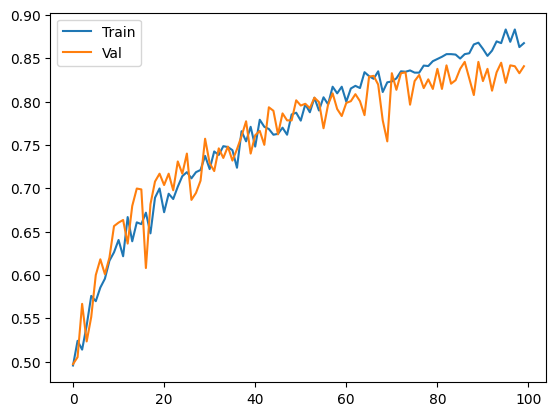

In [28]:
plt.plot(hist.history['accuracy'], label = 'Train')
plt.plot(hist.history['val_accuracy'], label = 'Val')
plt.legend()
plt.show()

In [29]:
test_generator = test_datagen.flow_from_directory('./data/cats_and_dogs/test',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 1000 images belonging to 2 classes.


In [30]:
model2 = model 

In [31]:
model2.load_weights('./model_cats_dogs.hdf5')

In [ ]:
model2.evaluate(test_generator)

32/32 [==============================] - 6s 192ms/step - loss: 0.4181 - accuracy: 0.8210


[0.4181146025657654, 0.8209999799728394]